Back to the main [Index](../index.ipynb)

In [1]:
# Use %matplotlib if you are running in the ipython shell.
%matplotlib notebook

from abipy.lessons.lesson_g0w0 import Lesson
lesson = Lesson() 
lesson

$G_0W_0$ band structure with an energy-dependent scissors operator
==================================================================

Background
----------

Standard functionals (LDA and GGA), systematically underestimate band gaps, giving values
that are about 30-40% smaller than experimental data.
The inability of standard Kohn-Sham (KS) theory to give band gaps close to experiment is often referred to as the **band-gap problem**.
From a theoretical point of view this is not surprising since KS eigenvalues are not supposed to give the correct band energies.
The band structure of a crystal is rigorously defined as the energies needed to add or subtract electrons from the many-body system
which, in turn, are related to the difference between total energies of many-body states differing by one electron.

An alternative, more traditional, approach to the study of exchange-correlation effects in
many-body systems is provided by Many-Body Perturbation Theory (MBPT) which defines a rigorous approach to the description
of excited-state properties, based on the Green's function formalism.
In this lesson, we discuss how to use the MBPT part of ABINIT to compute the band-structure of silicon
within the so-called $G_0W_0$ approximation.

For a very brief introduction to the many-body formalism, see MBPT_NOTES_.

.. _MBPT_NOTES: http://www.abinit.org/documentation/helpfiles/for-v7.10/tutorial/theory_mbt.html

Related ABINIT variables
------------------------

    * optdriver
    * ecuteps
    * ecutsigx
    * nband
    * gwcalctyp
    * gw_qprange
    * all gw** variables


More info on the input variables and it's usage can be obtained using the command:

    .. code-block:: python

        lesson.abinit_help(inputvariable)

that prints the official description of the variables.

Description of the lesson
-------------------------

In this lesson, we will construct an `abipy` flow made of two works.
The first work is a standard KS band-structure calculation that consists of
an initial GS calculation to get the density followed by two NSCF calculations.
The first NSCF task computes the KS eigenvalues on a high-symmetry path in the BZ,
whereas the second NSCF task employs a homogeneous k-mesh so that one can compute
the DOS from the KS eigenvalues.
This work is similar to the one we have already encountered in lesson_dos_bands.

The second work represents the real GW workflow that uses the density computed in the first task of
the previous work  to compute the KS bands for many empty states.
The WFK file produced in this step is then used to compute the screened interaction $W$.
Finally, we perform a self-energy calculation that uses the $W$ produced
in the previous step and the WFK file to compute the matrix elements of the self-energy and
the $G_0W_0$ corrections for all the k-points in the IBZ and 8 bands (4 occupied + 4 empty)

Once the flow is completed, we can interpolate the $G_0W_0$ corrections as function of the initial KS energy
to obtain an energy-dependent scissors operator.
At this point, we can apply the scissors operator onto the KS band structure to obtain
an approximated $G_0W_0$ band dispersion.

Don't worry if there are steps of the entire procedure that are not clear to you.
GW calculations are much more complicated than standard KS band structures and
the main goal of this lesson is to give you an overview of the Abipy capabilities.

Executing the lesson
--------------------

This lesson can be started in ipython by importing it with:

    .. code-block:: python

        from abipy.lessons.lesson_g0w0 import Lesson
        lesson = Lesson()

The `lesson` object gives us all the tools needed to execute this tutorial. As usual:

    .. code-block:: python

        lesson

displays this text.

The lesson module provides a factory function that returns a flow designed to perform standard G0W0 calculations.
To build the flow, use

    .. code-block:: python

        flow = lesson.make_flow()

`flow` is the object containi

# Examples

Build the flow:

In [2]:
flow = lesson.make_flow()

/Users/gmatteo/git_repos/pymatgen/pymatgen/symmetry/bandstructure.py:61: UserWarning: The input structure does not match the expected standard primitive! The path can be incorrect. Use at your own risk.
  warnings.warn("The input structure does not match the expected standard primitive! "


Show connections:

<IPython.core.display.Javascript object>


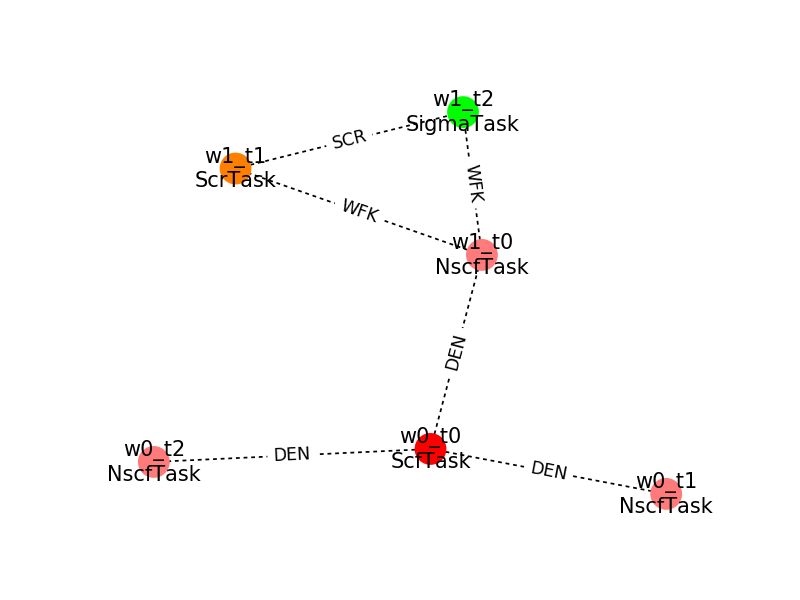

In [3]:
flow.plot_networkx(with_edge_labels=True)

Run the flow:

In [4]:
%%capture
flow.make_scheduler().start()

0

In [5]:
for i, work in enumerate(flow): 
    print("[%d] %s" % (i, work))

[0] <BandStructureWork, node_id=84335, workdir=flow_lesson_g0w0/w0>
[1] <Work, node_id=84339, workdir=flow_lesson_g0w0/w1>


In [6]:
bands_work = flow[0]
for task in bands_work: 
    print(task)

<ScfTask, node_id=84336, workdir=flow_lesson_g0w0/w0/t0>
<NscfTask, node_id=84337, workdir=flow_lesson_g0w0/w0/t1>
<NscfTask, node_id=84338, workdir=flow_lesson_g0w0/w0/t2>


The first work is a a `BandStructureWork` hence we have access to useful post-processing tools.
All the methods producing `matplotlib` figures starts with `plot`. Let's find them:

In [7]:
plot_methods = [s for s in dir(bands_work) if s.startswith("plot")]
print(plot_methods)

['plot_ebands', 'plot_ebands_with_edos', 'plot_edoses']


<IPython.core.display.Javascript object>


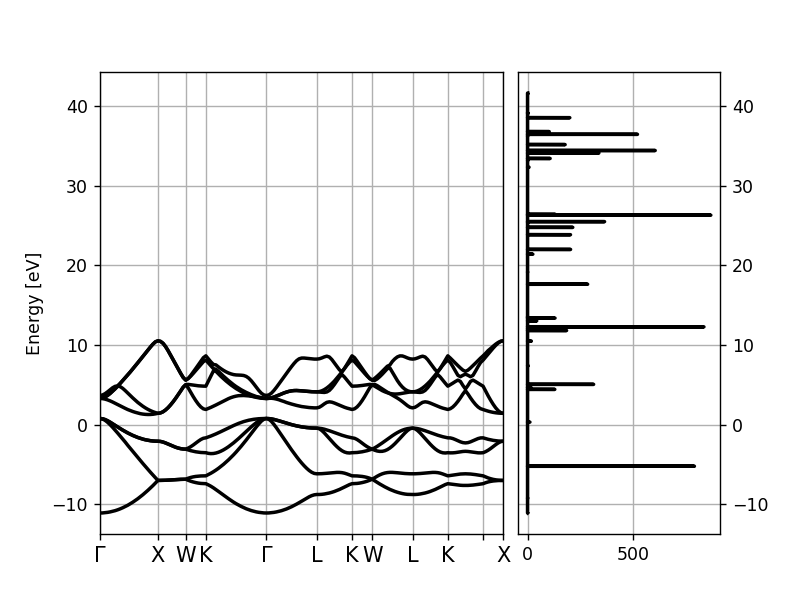

<IPython.core.display.Javascript object>


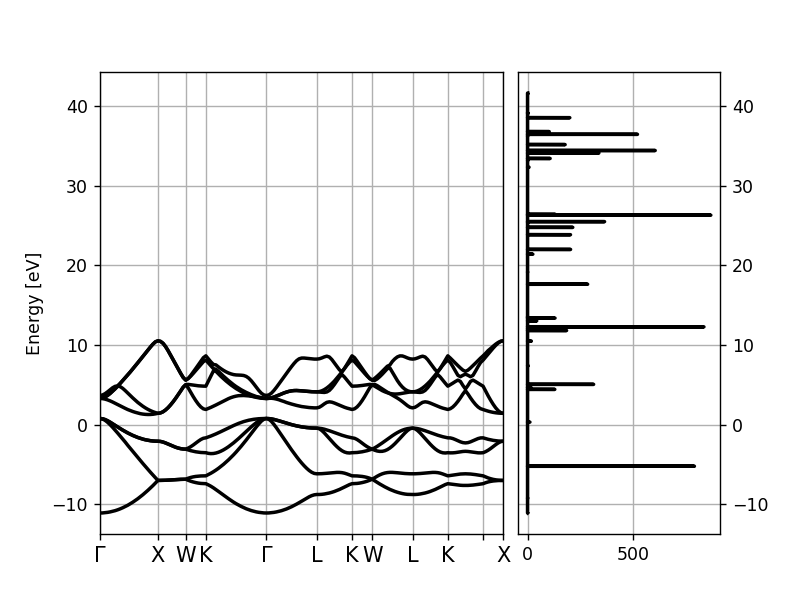

In [8]:
bands_work.plot_ebands()

Plot Bands and DOS:

<IPython.core.display.Javascript object>


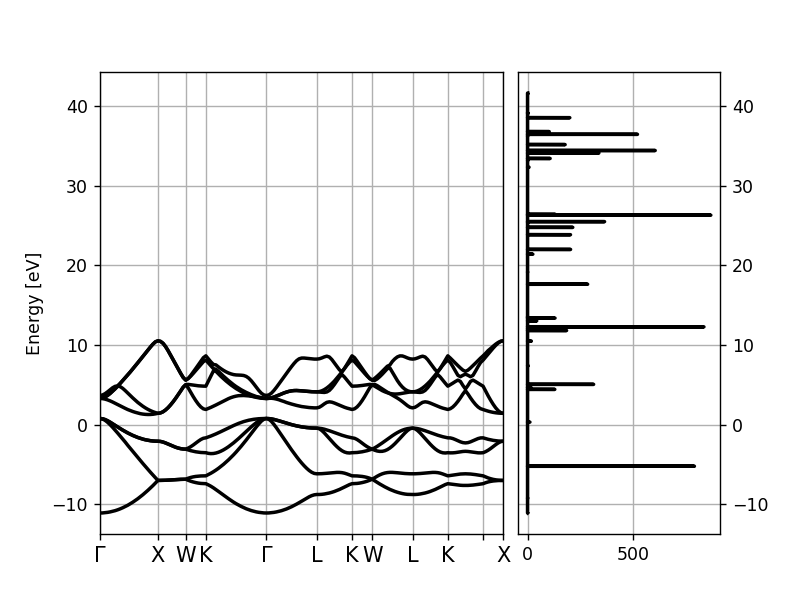

In [9]:
bands_work.plot_ebands_with_edos()
# Note that the DOS is computed from the WFK file containing many empty states

Want to change the smearing?

<IPython.core.display.Javascript object>


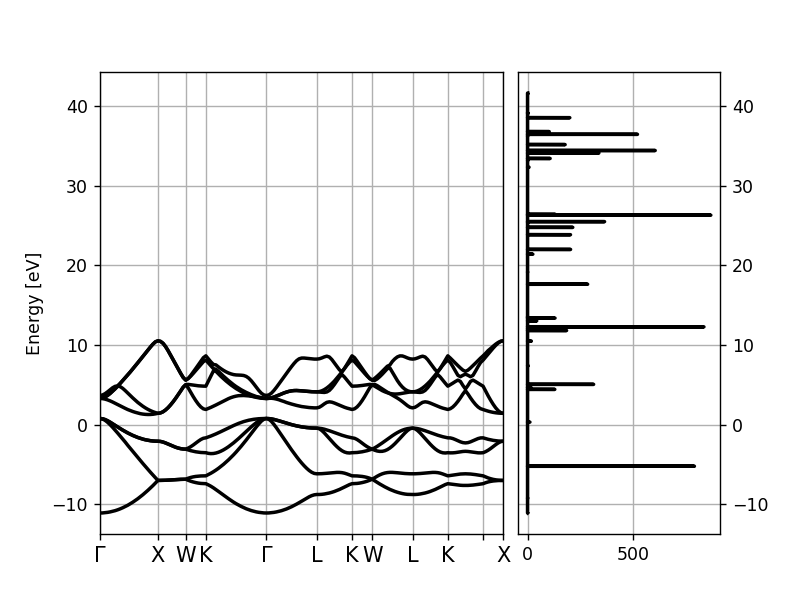

In [10]:
bands_work.plot_ebands_with_edos(width=5)

Oops, maybe 5 eV is too big!

<IPython.core.display.Javascript object>


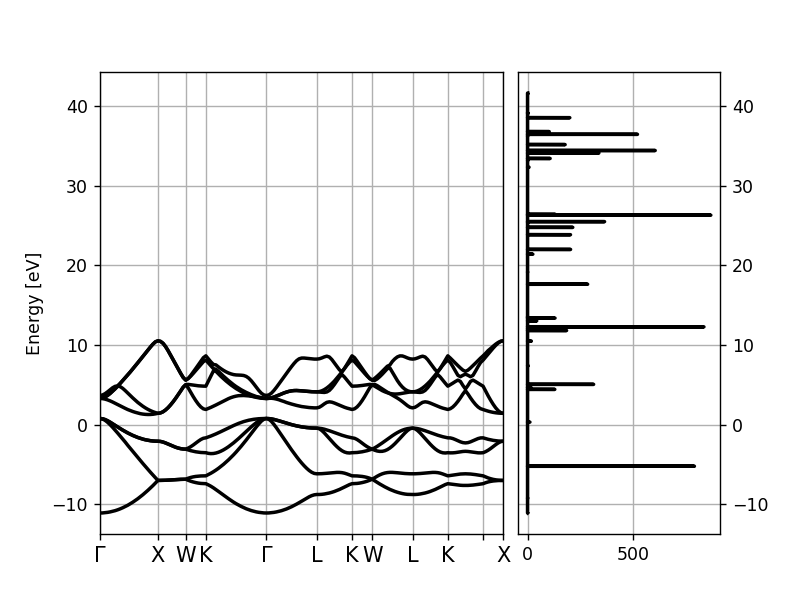

In [11]:
bands_work.plot_ebands_with_edos(width=1.0e-4)

and this one is too small!

# Analyzing the `Flow`

Call `lesson.analyze` to:
    
   * Interpolate the $GW$ corrections as a function of the initial KS energy
   * Apply the energy-dependent scissors operator to the initial KS bands in order 
     to compute an approximated GW band structure
   * Plot the approximated $GW$ band structure

/Users/gmatteo/anaconda2/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:181: ComplexWarning: Casting complex values to real discards the imaginary part
  xb=bbox[0],xe=bbox[1],s=s)


<IPython.core.display.Javascript object>


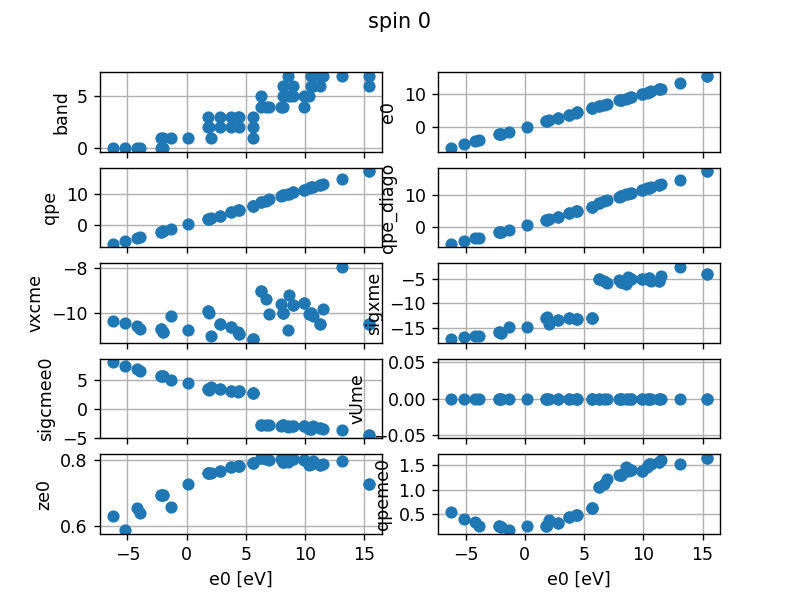

<IPython.core.display.Javascript object>


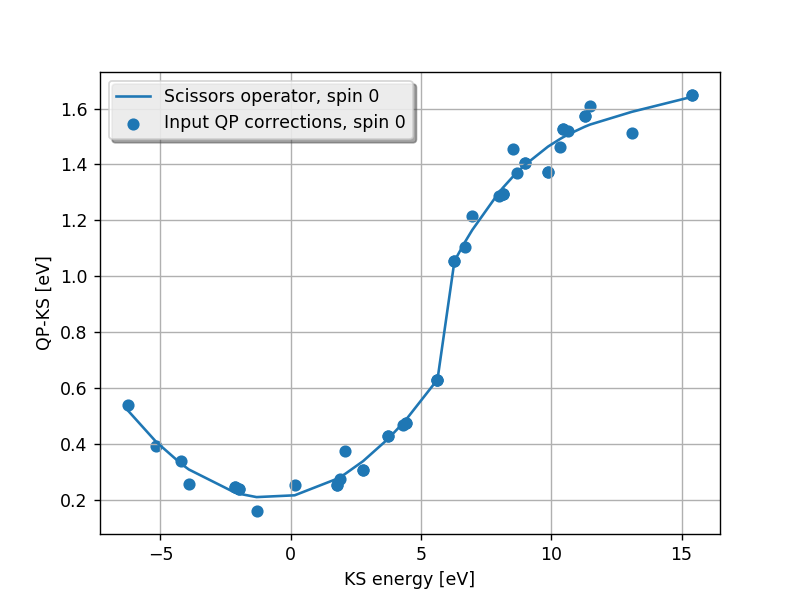

KS fermie 4.86334071177 --> QP fermie 5.39979593669 Delta(QP-KS)= 0.536455224923


<IPython.core.display.Javascript object>


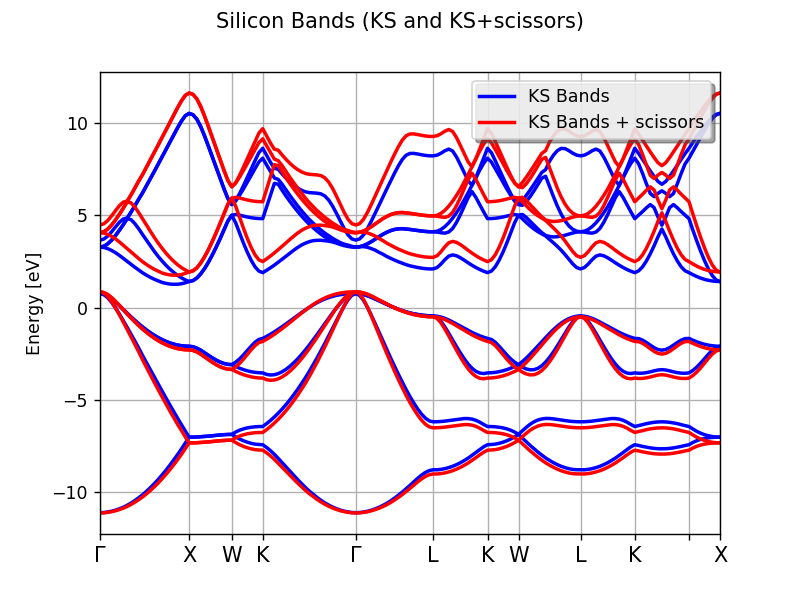

In [12]:
lesson.analyze(flow)

Meaning of the figures:
    
   - Panels with the most important $GW$ results 
     (QP corrections, renornalization factor $Z$, matrix elements of the self-energy) 
   - QP corrections as a function of KS energies and interpolating function
   - Approximated $G_0W_0$ band structure obtained with the scissors operator 